In [1]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Import datasets

In [2]:
csv_path = os.path.join("..", "..", "data","LINKED_DATA", "TSR_ALL", "TSR_ALL3","TSR_ALL3_score.csv")
tsr_all3_df = pd.read_csv(csv_path)
tsr_all3_df.shape

(58434, 30)

# Barthel vs NIHSS vs mRS

In [3]:
barthel = tsr_all3_df.feeding + tsr_all3_df.transfers + tsr_all3_df.bathing + tsr_all3_df.toilet_use + tsr_all3_df.grooming + tsr_all3_df.mobility + tsr_all3_df.stairs + tsr_all3_df.dressing + tsr_all3_df.bowel_control + tsr_all3_df.bladder_control
nihss_out = tsr_all3_df.nihs_1a_out + tsr_all3_df.nihs_1b_out + tsr_all3_df.nihs_1c_out + tsr_all3_df.nihs_2_out + tsr_all3_df.nihs_3_out + tsr_all3_df.nihs_4_out + tsr_all3_df.nihs_5al_out + tsr_all3_df.nihs_5br_out + tsr_all3_df.nihs_6al_out + tsr_all3_df.nihs_6br_out + tsr_all3_df.nihs_7_out + tsr_all3_df.nihs_8_out + tsr_all3_df.nihs_9_out + tsr_all3_df.nihs_10_out + tsr_all3_df.nihs_11_out
discharged_mrs = tsr_all3_df.discharged_mrs

score = pd.DataFrame([discharged_mrs, barthel, nihss_out]).T
score.columns = ["discharged_mrs", "barthel", "nihss_out"]
score["number"] = 1

total_number = score.groupby(["discharged_mrs", "barthel", "nihss_out"]).count()
total_number.reset_index(inplace=True)
total_number

discharged_mrs = total_number.discharged_mrs.values
barthel = total_number.barthel.values
nihss_out = total_number.nihss_out.values
number = total_number.number.values

C:\Users\Jacky C\anaconda3\envs\tsr_ml\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


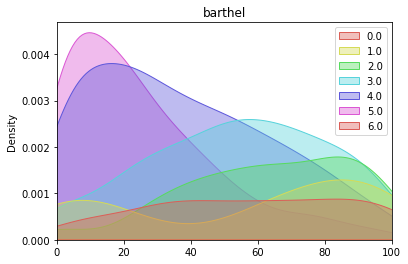

In [4]:
sns.kdeplot(barthel,hue = discharged_mrs,vertical=False, fill=True, alpha = 0.4, palette="hls", linewidth=1)
plt.title("barthel")
plt.xlim(0,100)
#plt.rcParams['figure.figsize'] = (10,5)
#plt.legend(loc=1)
plt.savefig('INFO/TSR_ALL3/Barthel_mRS_nc.png')
plt.show()

C:\Users\Jacky C\anaconda3\envs\tsr_ml\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


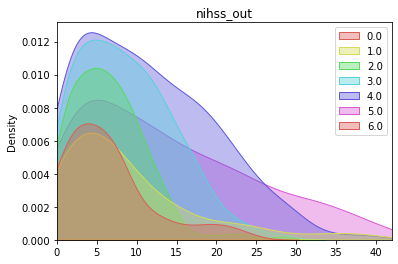

In [5]:
sns.kdeplot(nihss_out,hue = discharged_mrs,vertical=False, fill=True, alpha = 0.4, palette="hls", linewidth=1)
plt.title("nihss_out")
plt.xlim(0,42)
#plt.rcParams['figure.figsize'] = (10,5)
plt.savefig('INFO/TSR_ALL3/NIHSS_mRS_nc.png')
plt.show()

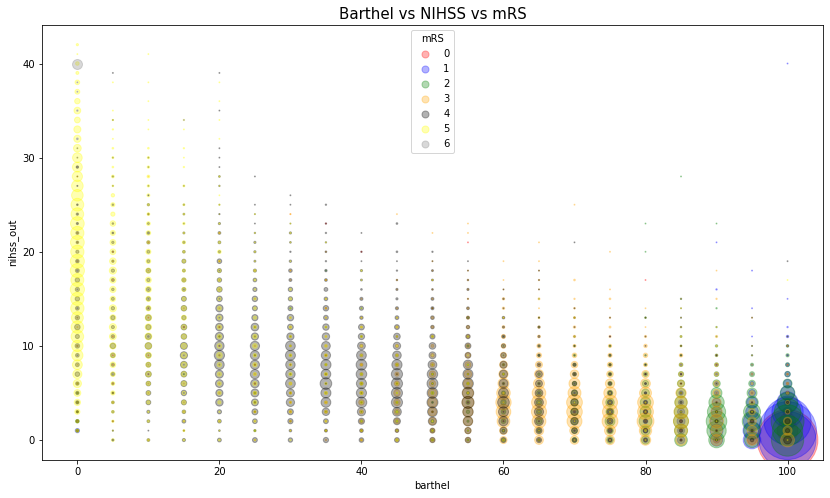

In [6]:
fig = plt.figure(figsize=(14,8))
#plt.scatter(barthel, nihss_out, c =  discharged_mrs, s = number, alpha = 0.7, cmap = "jet")
plt.scatter(barthel[discharged_mrs == 0], nihss_out[discharged_mrs == 0], c =  "red", s = number[discharged_mrs == 0], alpha = 0.3, label = 0)
plt.scatter(barthel[discharged_mrs == 1], nihss_out[discharged_mrs == 1], c =  "blue", s = number[discharged_mrs == 1], alpha = 0.3, label = 1)
plt.scatter(barthel[discharged_mrs == 2], nihss_out[discharged_mrs == 2], c =  "green", s = number[discharged_mrs == 2], alpha = 0.3, label = 2)
plt.scatter(barthel[discharged_mrs == 3], nihss_out[discharged_mrs == 3], c =  "orange", s = number[discharged_mrs == 3], alpha = 0.3, label = 3)
plt.scatter(barthel[discharged_mrs == 4], nihss_out[discharged_mrs == 4], c = "black" , s = number[discharged_mrs == 4], alpha = 0.3, label = 4)
plt.scatter(barthel[discharged_mrs == 5], nihss_out[discharged_mrs == 5], c = "yellow" , s = number[discharged_mrs == 5], alpha = 0.3, label = 5)
plt.scatter(barthel[discharged_mrs == 6], nihss_out[discharged_mrs == 6], c = "grey" , s = number[discharged_mrs == 6]*100, alpha = 0.3, label = 6)
plt.title('Barthel vs NIHSS vs mRS', fontsize=15)
plt.xlabel('barthel')
plt.ylabel('nihss_out')
lgnd = plt.legend(title = "mRS")
for handle in lgnd.legendHandles:
    handle.set_sizes([50])
plt.savefig('INFO/TSR_ALL3/Barthel_NIHSS_mRS_2D_nc.png')
plt.show()

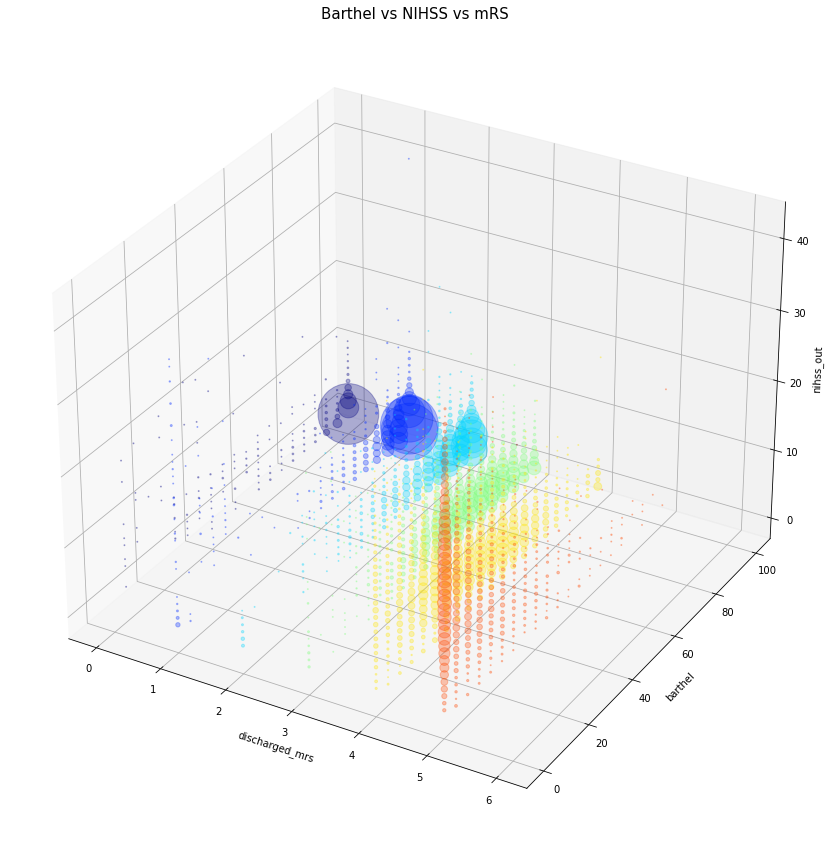

In [7]:
fig = plt.figure(figsize=(15,15))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(discharged_mrs, barthel, nihss_out, s = number, c = discharged_mrs, cmap = "jet", alpha = 0.3)
ax.set_title('Barthel vs NIHSS vs mRS', fontsize=15)
ax.set_xlabel('discharged_mrs')
ax.set_ylabel('barthel')
ax.set_zlabel('nihss_out')
plt.savefig('INFO/TSR_ALL3/Barthel_NIHSS_mRS_3D_nc.png')
plt.show()

# Convert the multiple feature and outcome into binary ones

In [8]:
discharged = tsr_all3_df.discharged_mrs
discharged[(discharged == 0) | (discharged == 1) | (discharged == 2)] = 1 #GOOD
discharged[(discharged == 3) | (discharged == 4) | (discharged == 5) | (discharged == 6) | (discharged == 9)] = 0 #BAD

<ipython-input-8-54687ce06059>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  discharged[(discharged == 0) | (discharged == 1) | (discharged == 2)] = 1 #GOOD
<ipython-input-8-54687ce06059>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  discharged[(discharged == 3) | (discharged == 4) | (discharged == 5) | (discharged == 6) | (discharged == 9)] = 0 #BAD


# Barthel vs NIHSS vs mRS (2 classes)

In [9]:
barthel = tsr_all3_df.feeding + tsr_all3_df.transfers + tsr_all3_df.bathing + tsr_all3_df.toilet_use + tsr_all3_df.grooming + tsr_all3_df.mobility + tsr_all3_df.stairs + tsr_all3_df.dressing + tsr_all3_df.bowel_control + tsr_all3_df.bladder_control
nihss_out = tsr_all3_df.nihs_1a_out + tsr_all3_df.nihs_1b_out + tsr_all3_df.nihs_1c_out + tsr_all3_df.nihs_2_out + tsr_all3_df.nihs_3_out + tsr_all3_df.nihs_4_out + tsr_all3_df.nihs_5al_out + tsr_all3_df.nihs_5br_out + tsr_all3_df.nihs_6al_out + tsr_all3_df.nihs_6br_out + tsr_all3_df.nihs_7_out + tsr_all3_df.nihs_8_out + tsr_all3_df.nihs_9_out + tsr_all3_df.nihs_10_out + tsr_all3_df.nihs_11_out
discharged_mrs = tsr_all3_df.discharged_mrs

score = pd.DataFrame([discharged_mrs, barthel, nihss_out]).T
score.columns = ["discharged_mrs", "barthel", "nihss_out"]
score["number"] = 1

total_number = score.groupby(["discharged_mrs", "barthel", "nihss_out"]).count()
total_number.reset_index(inplace=True)
total_number

discharged_mrs = total_number.discharged_mrs.values
barthel = total_number.barthel.values
nihss_out = total_number.nihss_out.values
number = total_number.number.values

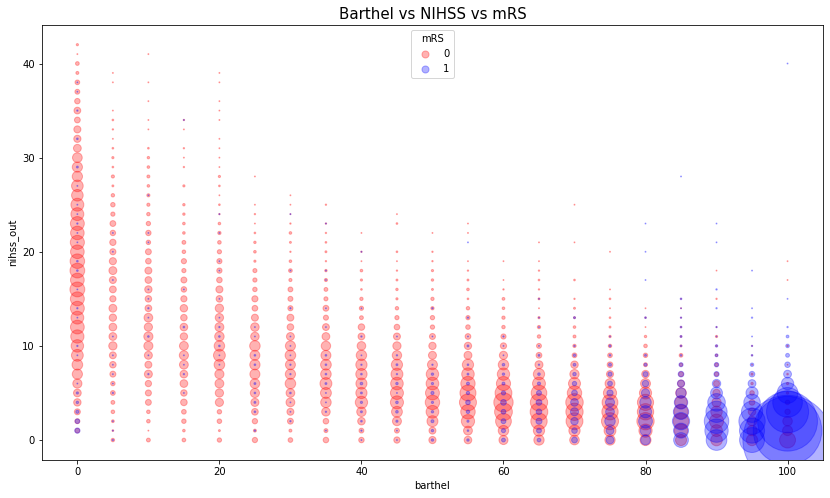

In [10]:
fig = plt.figure(figsize=(14,8))
#plt.scatter(barthel, nihss_out, c =  discharged_mrs, s = number, alpha = 0.7, cmap = "jet")
plt.scatter(barthel[discharged_mrs == 0], nihss_out[discharged_mrs == 0], c =  "red", s = number[discharged_mrs == 0], alpha = 0.3, label = 0)
plt.scatter(barthel[discharged_mrs == 1], nihss_out[discharged_mrs == 1], c =  "blue", s = number[discharged_mrs == 1], alpha = 0.3, label = 1)
plt.title('Barthel vs NIHSS vs mRS', fontsize=15)
plt.xlabel('barthel')
plt.ylabel('nihss_out')
lgnd = plt.legend(title = "mRS")
for handle in lgnd.legendHandles:
    handle.set_sizes([50])
plt.savefig('INFO/TSR_ALL3/Barthel_NIHSS_mRS2_2D_nc.png')
plt.show()

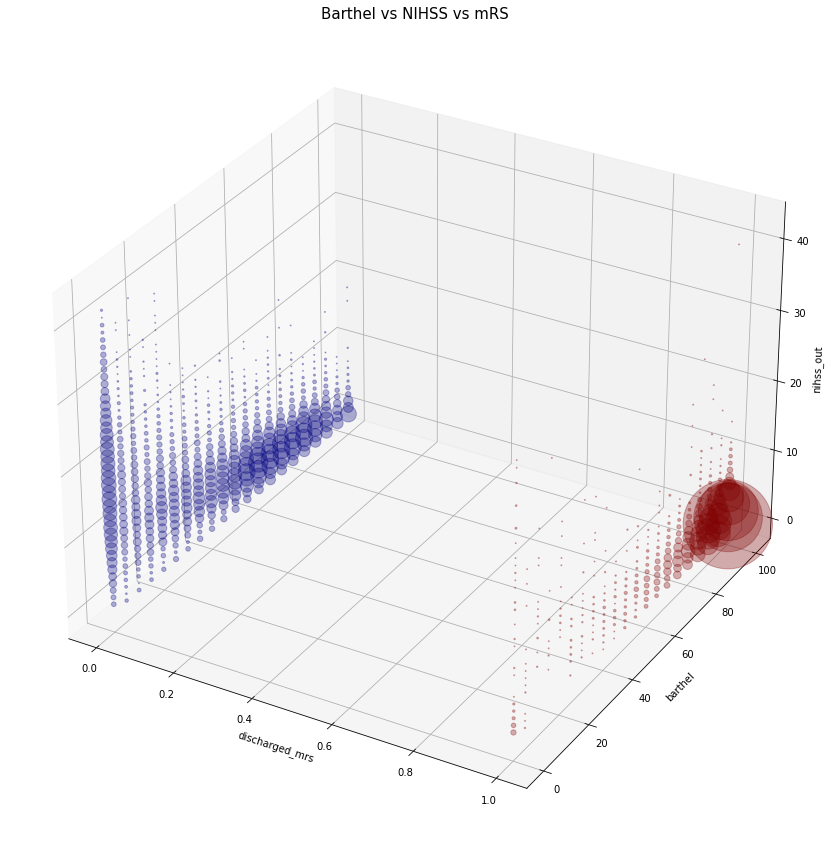

In [11]:
fig = plt.figure(figsize=(15,15))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(discharged_mrs, barthel, nihss_out, s = number, c = discharged_mrs, cmap = "jet", alpha = 0.3)
ax.set_title('Barthel vs NIHSS vs mRS', fontsize=15)
ax.set_xlabel('discharged_mrs')
ax.set_ylabel('barthel')
ax.set_zlabel('nihss_out')
plt.savefig('INFO/TSR_ALL3/Barthel_NIHSS_mRS2_3D_nc.png')
plt.show()